#### **Bu notebook'un amacı:**
1. Domain knowledge ile meaningful features yaratmak
2. Her feature'ın "neden yarattık?" sorusunu cevaplamak
3. Modüler, tekrar kullanılabilir kod yazmak
4. 04_Model_Comparison'da feature selection için hazırlık

#### **Feature Engineering Felsefesi:**
- "More is NOT better" → Quality > Quantity
- Her feature bir hipotez test eder
- Feature selection 04'te yapacağız

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
# Seed for reproducibility
np.random.seed(42)

In [3]:
df = pd.read_csv('../data/marketing_analytics_cleaned.csv')

print("📊 Dataset Shape:", df.shape)
print("\n✅ Target Variable Distribution:")
print(df['Conversion'].value_counts())
print(f"\nConversion Rate: {df['Conversion'].mean() * 100:.2f}%")


📊 Dataset Shape: (48000, 20)

✅ Target Variable Distribution:
Conversion
0    47020
1      980
Name: count, dtype: int64

Conversion Rate: 2.04%


#### **FEATURE ENGINEERING - ROI & COST METRICS**
**NEDEN BU FEATURE'LAR?**

Marketing'de en önemli metrik: ROI (Return on Investment)
"Bu müşteriye harcadığımız para ne kadar verimli?"

_HYPOTHESIS_:
- Düşük CPA (Cost Per Acquisition) olan channel'lar daha iyi
- Yüksek ROI proxy'si olan müşteriler convert olma eğiliminde


In [4]:
print("\n" + "="*70)
print("FEATURE GROUP 1: ROI & COST METRICS")
print("="*70)

# Feature 1: Cost Per Acquisition (CPA) Proxy
# Formula: AdSpend / (Conversion + 1)
# Neden +1? Zero division protection (henüz convert olmamış müşteriler için)
df['CPA_Proxy'] = df['AdSpend'] / (df['Conversion'] + 1)

print("\n✅ CPA_Proxy created")
print(f"   Mean: ${df['CPA_Proxy'].mean():.2f}")
print(f"   Interpretation: Ortalama müşteri başına maliyet proxy")


FEATURE GROUP 1: ROI & COST METRICS

✅ CPA_Proxy created
   Mean: $1495.12
   Interpretation: Ortalama müşteri başına maliyet proxy


In [5]:
# Feature 2: ROI Proxy
# Formula: (ConversionRate * Income) / AdSpend
# Mantık: Potansiyel değer / Harcanan para
# Yüksek income + yüksek conversion rate + düşük AdSpend = İyi ROI
df['ROI_Proxy'] = (df['ConversionRate'] * df['Income']) / (df['AdSpend'] + 1)

print("\n✅ ROI_Proxy created")
print(f"   Mean: {df['ROI_Proxy'].mean():.2f}")
print(f"   Interpretation: Potansiyel customer value / Marketing cost")


✅ ROI_Proxy created
   Mean: 0.84
   Interpretation: Potansiyel customer value / Marketing cost


In [6]:
# Feature 3: Spend Efficiency
# Formula: ClickThroughRate / AdSpend
# Mantık: Harcanan para başına tıklama verimliliği
df['Spend_Efficiency'] = df['ClickThroughRate'] / (df['AdSpend'] + 1)

print("\n✅ Spend_Efficiency created")
print(f"   Mean: {df['Spend_Efficiency'].mean():.6f}")
print(f"   Interpretation: AdSpend verimliliği (CTR per dollar)")


✅ Spend_Efficiency created
   Mean: 0.000058
   Interpretation: AdSpend verimliliği (CTR per dollar)


#### **FEATURE ENGINEERING - ENGAGEMENT METRICS**

**NEDEN BU FEATURE'LAR?**

User engagement = Conversion'ın en güçlü göstergelerinden biri
"Müşteri ne kadar engaged?"

**HYPOTHESIS:**
- Sitede daha fazla zaman geçiren → Daha fazla ilgili → Conversion ↑
- Daha fazla sayfa gezen → Daha fazla araştıran → Conversion ↑
- Email açan ama tıklamayan → İlgili ama kararsız

In [7]:
print("\n" + "="*70)
print("FEATURE GROUP 2: ENGAGEMENT METRICS")
print("="*70)


FEATURE GROUP 2: ENGAGEMENT METRICS


In [8]:

# Feature 4: Site Engagement Score
# Formula: TimeOnSite * PagesPerVisit
# Mantık: Derinlemesine engagement (hem süre hem depth)
df['Site_Engagement'] = df['TimeOnSite'] * df['PagesPerVisit'].fillna(1)

print("\n✅ Site_Engagement created")
print(f"   Mean: {df['Site_Engagement'].mean():.2f}")
print(f"   Interpretation: Engagement depth (time × pages)")


✅ Site_Engagement created
   Mean: 45.22
   Interpretation: Engagement depth (time × pages)


In [9]:
# Feature 5: Average Time Per Page
# Formula: TimeOnSite / PagesPerVisit
# Mantık: Her sayfada ne kadar vakit geçiriyor? (Bounce rate proxy)
df['Avg_Time_Per_Page'] = df['TimeOnSite'] / (df['PagesPerVisit'].fillna(1))

print("\n✅ Avg_Time_Per_Page created")
print(f"   Mean: {df['Avg_Time_Per_Page'].mean():.2f}")
print(f"   Interpretation: Time per page (bounce rate inverse)")



✅ Avg_Time_Per_Page created
   Mean: 1.39
   Interpretation: Time per page (bounce rate inverse)


In [10]:
# Feature 6: CTR to Conversion Ratio
# Formula: ConversionRate / ClickThroughRate
# Mantık: Tıklama → Conversion dönüşüm verimliliği
df['CTR_to_Conversion'] = df['ConversionRate'] / (df['ClickThroughRate'] + 0.0001)

print("\n✅ CTR_to_Conversion created")
print(f"   Mean: {df['CTR_to_Conversion'].mean():.2f}")
print(f"   Interpretation: Click → Conversion efficiency")



✅ CTR_to_Conversion created
   Mean: 17.05
   Interpretation: Click → Conversion efficiency


In [11]:
# Feature 7: Email Engagement
# Formula: EmailClicks / (EmailOpens + 1)
# Mantık: Email açanların ne kadarı tıklıyor?
df['Email_Click_Rate'] = df['EmailClicks'] / (df['EmailOpens'] + 1)

print("\n✅ Email_Click_Rate created")
print(f"   Mean: {df['Email_Click_Rate'].mean():.3f}")
print(f"   Interpretation: Email engagement quality")


✅ Email_Click_Rate created
   Mean: 0.116
   Interpretation: Email engagement quality


In [12]:
# Feature 8: Social Virality
# Formula: SocialShares / (WebsiteVisits + 1)
# Mantık: Ziyaret başına paylaşım eğilimi
df['Social_Virality'] = df['SocialShares'] / (df['WebsiteVisits'] + 1)

print("\n✅ Social_Virality created")
print(f"   Mean: {df['Social_Virality'].mean():.3f}")
print(f"   Interpretation: Share propensity per visit")


✅ Social_Virality created
   Mean: 2.491
   Interpretation: Share propensity per visit


#### **FEATURE ENGINEERING - CUSTOMER SEGMENTATION**
**NEDEN BU FEATURE'LAR?**

Farklı müşteri segmentleri farklı davranır
"Bu müşteri hangi profile yakın?"

**HYPOTHESIS:**
- Genç vs yaşlı müşteriler farklı channel'larda aktif
- Yüksek income müşteriler farklı campaign'lere tepki verir
- Loyalty tier'ı yüksek müşteriler daha fazla convert olur

In [13]:
print("\n" + "="*70)
print("FEATURE GROUP 3: CUSTOMER SEGMENTATION")
print("="*70)


FEATURE GROUP 3: CUSTOMER SEGMENTATION


In [14]:
# Feature 9: Age Group (Binning)
# Kategoriler: Young Adult, Adult, Middle Age, Senior
df['Age_Group'] = pd.cut(df['Age'],
                          bins=[0, 25, 35, 50, 100],
                          labels=['YoungAdult', 'Adult', 'MiddleAge', 'Senior'])

print("\n✅ Age_Group created")
print(df['Age_Group'].value_counts())


✅ Age_Group created
Age_Group
MiddleAge     16796
Adult         16438
Senior         8868
YoungAdult     5898
Name: count, dtype: int64


In [15]:
# Feature 10: Income Tier (Quantile-based)
# Kategoriler: Low, Medium, High, VeryHigh
df['Income_Tier'] = pd.qcut(df['Income'],
                              q=4,
                              labels=['Low', 'Medium', 'High', 'VeryHigh'],
                              duplicates='drop')

print("\n✅ Income_Tier created")
print(df['Income_Tier'].value_counts())


✅ Income_Tier created
Income_Tier
Low         12001
Medium      12000
VeryHigh    12000
High        11999
Name: count, dtype: int64


In [16]:
# Feature 11: Loyalty Tier (Quantile-based)
# Kategoriler: Bronze, Silver, Gold
df['Loyalty_Tier'] = pd.qcut(df['LoyaltyPoints'],
                               q=3,
                               labels=['Bronze', 'Silver', 'Gold'],
                               duplicates='drop')

print("\n✅ Loyalty_Tier created")
print(df['Loyalty_Tier'].value_counts())


✅ Loyalty_Tier created
Loyalty_Tier
Bronze    16034
Silver    16005
Gold      15961
Name: count, dtype: int64


In [17]:
# Feature 12: Customer Value Score
# Formula: PreviousPurchases * LoyaltyPoints * Income (normalized)
# Mantık: Customer Lifetime Value (CLV) proxy
df['Customer_Value_Score'] = (
    df['PreviousPurchases'] *
    df['LoyaltyPoints'] *
    (df['Income'] / df['Income'].max())  # Normalize income
)

print("\n✅ Customer_Value_Score created")
print(f"   Mean: {df['Customer_Value_Score'].mean():.2f}")
print(f"   Interpretation: CLV proxy (purchase history × loyalty × income)")


✅ Customer_Value_Score created
   Mean: 2957.54
   Interpretation: CLV proxy (purchase history × loyalty × income)


#### **FEATURE ENGINEERING - INTERACTION FEATURES**

**NEDEN BU FEATURE'LAR?**

Interaction features = Non-linear relationships yakalama
"İki feature birlikte nasıl etkiliyor?"

**HYPOTHESIS:**
- Yüksek AdSpend × Yüksek CTR = Güçlü sinerji
- Yüksek Income × Yüksek Loyalty = Premium customer

In [18]:
print("\n" + "="*70)
print("FEATURE GROUP 4: INTERACTION FEATURES")
print("="*70)


FEATURE GROUP 4: INTERACTION FEATURES


In [19]:
# Feature 13: AdSpend × CTR (Marketing Effectiveness)
df['AdSpend_x_CTR'] = df['AdSpend'] * df['ClickThroughRate']

print("\n✅ AdSpend_x_CTR created")
print(f"   Mean: {df['AdSpend_x_CTR'].mean():.2f}")



✅ AdSpend_x_CTR created
   Mean: 118.08


In [20]:
# Feature 14: Income × LoyaltyPoints (Premium Customer Indicator)
df['Income_x_Loyalty'] = (df['Income'] / 10000) * (df['LoyaltyPoints'] / 1000)

print("\n✅ Income_x_Loyalty created")
print(f"   Mean: {df['Income_x_Loyalty'].mean():.2f}")


✅ Income_x_Loyalty created
   Mean: 4.07


In [21]:
# Feature 15: Age × PreviousPurchases (Experienced Customer)
df['Age_x_Purchases'] = df['Age'] * df['PreviousPurchases']

print("\n✅ Age_x_Purchases created")
print(f"   Mean: {df['Age_x_Purchases'].mean():.2f}")


✅ Age_x_Purchases created
   Mean: 48.00


#### **CHANNEL PERFORMANCE FEATURES (01_EDA'DAN ÖĞRENDIKLERIMIZ)**
**NEDEN BU FEATURE'LAR?**

01_EDA'da hangi channel'ların daha iyi performans gösterdiğini gördük.
Bu bilgiyi model'e feature olarak verelim.

**HYPOTHESIS:**
- Best performing channel'daki müşteriler daha fazla convert olur

In [22]:
print("\n" + "="*70)
print("FEATURE GROUP 5: CHANNEL PERFORMANCE FEATURES")
print("="*70)


FEATURE GROUP 5: CHANNEL PERFORMANCE FEATURES


In [23]:
channel_performance = {
    'Referral': 'High',        # 1.49% - En yüksek
    'Email': 'High',           # 1.43% - İkinci en yüksek
    'Display': 'Medium',       # 1.33%
    'PPC': 'Medium',           # 1.27%
    'Social Media': 'Medium',  # 1.17%
    'Affiliate': 'Low',        # 1.11%
    'SEO': 'Low'               # 1.04% - En düşük
}

In [24]:
# Feature 16: Channel Performance Tier
df['Channel_Performance'] = df['CampaignChannel'].map(channel_performance)

print("\n✅ Channel_Performance created")
print(df['Channel_Performance'].value_counts())



✅ Channel_Performance created
Channel_Performance
Medium    25427
High      15807
Low        6766
Name: count, dtype: int64


In [25]:
# Feature 17: Is Best Channel? (Binary)
# Best 2 channel: Referral ve Email
df['Is_Best_Channel'] = df['CampaignChannel'].isin(['Referral', 'Email']).astype(int)

print("\n✅ Is_Best_Channel created")
print(f"   Best channel users (Referral + Email): {df['Is_Best_Channel'].sum()}")
print(f"   Percentage: {(df['Is_Best_Channel'].mean() * 100):.2f}%")


✅ Is_Best_Channel created
   Best channel users (Referral + Email): 15807
   Percentage: 32.93%


#### **FEATURE SUMMARY**

In [26]:
print("📊 FEATURE ENGINEERING SUMMARY")

new_features = [
    'CPA_Proxy', 'ROI_Proxy', 'Spend_Efficiency',  # ROI
    'Site_Engagement', 'Avg_Time_Per_Page', 'CTR_to_Conversion',  # Engagement
    'Email_Click_Rate', 'Social_Virality',  # Engagement cont.
    'Age_Group', 'Income_Tier', 'Loyalty_Tier', 'Customer_Value_Score',  # Segmentation
    'AdSpend_x_CTR', 'Income_x_Loyalty', 'Age_x_Purchases',  # Interactions
    'Channel_Performance', 'Is_Best_Channel'  # Channel
]

print(f"\n✅ Total NEW features created: {len(new_features)}")
print(f"✅ Original features: {df.shape[1] - len(new_features)}")
print(f"✅ Total features: {df.shape[1]}")

print("\n📋 Feature List:")
for i, feature in enumerate(new_features, 1):
    print(f"   {i:2d}. {feature}")




📊 FEATURE ENGINEERING SUMMARY

✅ Total NEW features created: 17
✅ Original features: 20
✅ Total features: 37

📋 Feature List:
    1. CPA_Proxy
    2. ROI_Proxy
    3. Spend_Efficiency
    4. Site_Engagement
    5. Avg_Time_Per_Page
    6. CTR_to_Conversion
    7. Email_Click_Rate
    8. Social_Virality
    9. Age_Group
   10. Income_Tier
   11. Loyalty_Tier
   12. Customer_Value_Score
   13. AdSpend_x_CTR
   14. Income_x_Loyalty
   15. Age_x_Purchases
   16. Channel_Performance
   17. Is_Best_Channel


#### **HANDLING INFINITE & NAN VALUES**

In [27]:
print("\n" + "="*70)
print("🔧 DATA QUALITY CHECK")
print("="*70)


🔧 DATA QUALITY CHECK


In [28]:
# Check for infinite values
inf_cols = []
for col in new_features:
    if df[col].dtype in ['float64', 'int64']:
        if np.isinf(df[col]).any():
            inf_cols.append(col)
            print(f"⚠️ {col}: {np.isinf(df[col]).sum()} infinite values")

# Replace inf with NaN, then fill with median
if inf_cols:
    for col in inf_cols:
        df[col].replace([np.inf, -np.inf], np.nan, inplace=True)
        df[col].fillna(df[col].median(), inplace=True)
    print(f"\n✅ Infinite values replaced with median")


In [29]:
# Check for NaN values
nan_cols = df[new_features].isnull().sum()
nan_cols = nan_cols[nan_cols > 0]

if len(nan_cols) > 0:
    print(f"\n⚠️ NaN values found:")
    print(nan_cols)

    # Fill NaN with median for numeric, mode for categorical
    for col in nan_cols.index:
        if df[col].dtype in ['float64', 'int64']:
            df[col].fillna(df[col].median(), inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)

    print(f"\n✅ NaN values filled")
else:
    print("\n✅ No NaN values")



✅ No NaN values


#### **FEATURE CORRELATION WITH TARGET**
**QUICK CHECK**: Hangi feature'lar Conversion'la en yüksek korelasyonlu?
Bu 04_Model_Comparison'da feature selection için ipucu verir.

In [30]:
print("\n" + "="*70)
print("🎯 FEATURE CORRELATION WITH TARGET")
print("="*70)


🎯 FEATURE CORRELATION WITH TARGET


In [31]:
# Sadece numeric features için
numeric_new_features = [f for f in new_features if df[f].dtype in ['float64', 'int64']]

correlations = df[numeric_new_features + ['Conversion']].corr()['Conversion'].drop('Conversion')
correlations = correlations.abs().sort_values(ascending=False)

print("\nTop 10 Features (by absolute correlation with Conversion):")
print("="*70)
for i, (feature, corr) in enumerate(correlations.head(10).items(), 1):
    print(f"{i:2d}. {feature:30s} → |r| = {corr:.4f}")




Top 10 Features (by absolute correlation with Conversion):
 1. CPA_Proxy                      → |r| = 0.2311
 2. Age_x_Purchases                → |r| = 0.1024
 3. Income_x_Loyalty               → |r| = 0.0993
 4. Customer_Value_Score           → |r| = 0.0923
 5. Spend_Efficiency               → |r| = 0.0497
 6. AdSpend_x_CTR                  → |r| = 0.0451
 7. ROI_Proxy                      → |r| = 0.0249
 8. Is_Best_Channel                → |r| = 0.0173
 9. Email_Click_Rate               → |r| = 0.0105
10. CTR_to_Conversion              → |r| = 0.0082


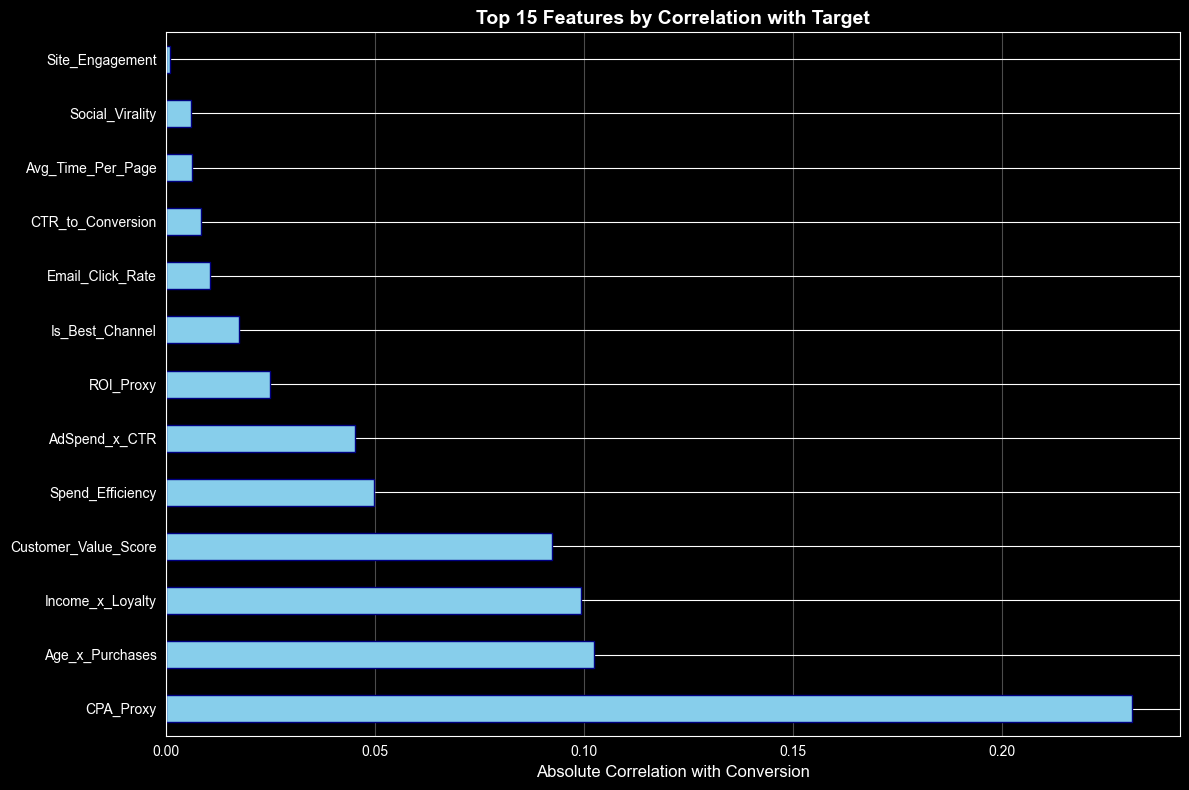


💡 Interpretation:
   - Yüksek korelasyon = Feature Conversion'ı tahmin etmede güçlü
   - Düşük korelasyon ≠ İşe yaramaz! (non-linear effects olabilir)
   - Feature selection 04'te yapılacak (XGBoost feature importance)


In [32]:
# Visualization
plt.figure(figsize=(12, 8))
correlations.head(15).plot(kind='barh', color='skyblue', edgecolor='navy')
plt.xlabel('Absolute Correlation with Conversion', fontsize=12)
plt.title('Top 15 Features by Correlation with Target', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n💡 Interpretation:")
print("   - Yüksek korelasyon = Feature Conversion'ı tahmin etmede güçlü")
print("   - Düşük korelasyon ≠ İşe yaramaz! (non-linear effects olabilir)")
print("   - Feature selection 04'te yapılacak (XGBoost feature importance)")



In [33]:

print("\n" + "="*70)
print("💾 SAVING PROCESSED DATA")
print("="*70)

# Save to CSV
output_path = '../data/marketing_analytics_featured.csv'
df.to_csv(output_path, index=False)

print(f"\n✅ Data saved to: {output_path}")
print(f"   Shape: {df.shape}")
print(f"   Features: {df.shape[1]}")
print(f"   Samples: {df.shape[0]}")

print("\n" + "="*70)
print("🎉 FEATURE ENGINEERING COMPLETED!")
print("="*70)
print("\nNext Steps:")
print("   1. 03_Channel_Analytics.ipynb → Channel deep dive")
print("   2. 04_Model_Comparison.ipynb → Model training + Feature selection")
print("="*70)


💾 SAVING PROCESSED DATA

✅ Data saved to: ../data/marketing_analytics_featured.csv
   Shape: (48000, 37)
   Features: 37
   Samples: 48000

🎉 FEATURE ENGINEERING COMPLETED!

Next Steps:
   1. 03_Channel_Analytics.ipynb → Channel deep dive
   2. 04_Model_Comparison.ipynb → Model training + Feature selection
